## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report

## Read Data from CSV file

In [2]:
Data = pd.read_csv("^GSPC1980.csv")
del Data["Adj Close"]
Data.head()

,Date,Open,High,Low,Close,Volume
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000


## % Change Column

In [3]:
Data["% Change"] = Data["Close"].diff() 
Data.head()

,Date,Open,High,Low,Close,Volume,% Change
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000,NaN
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000,-0.540001
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000,1.299996
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000,0.290001
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000,2.139999


## Smooth the Data (OPTIONAL)

## RSI Calculation

In [4]:
##calculate 14 day RSI
n=14

#make two copies of dataframe
up_df, down_df = Data[["% Change"]].copy(), Data[["% Change"]].copy(), 

#up days only need + returns
up_df.loc["% Change"] = up_df.loc[(up_df["% Change"] < 0), "% Change"] =0

##down days only need - returns
down_df.loc["% Change"] = down_df.loc[(down_df["% Change"] > 0), "% Change"] =0

##% change should be absolute
down_df['% Change'] = down_df["% Change"].abs()

##Calculate EWMA
ewma_up = up_df["% Change"].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df["% Change"].transform(lambda x: x.ewm(span = n).mean())

##Calculate Relative Strength 
relative_strength = ewma_up/ewma_down

##Calculate Relative Strength Index
rsi = 100 - (100 / (1.0 + relative_strength))

##Add Calculations to Data
Data["-% Days"] = down_df["% Change"]
Data["+% Days"] = up_df["% Change"]
Data["RSI"] = rsi
     
Data.head()

,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000,NaN,NaN,NaN,NaN
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000,-0.540001,0.540001,0.000000,0.000000
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000,1.299996,0.000000,1.299996,73.529316
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000,0.290001,0.000000,0.290001,77.741944
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000,2.139999,0.000000,2.139999,90.548730


## Stochastic Oscillator

In [5]:
##Stochastic Oscillator follows the speed or the momentum of the price. As a rule, 
##momentum changes before the price changes. 
##It measures the level of the closing price relative to the low-high range over a period of time.

In [6]:
##make copy of high and low
low_14, high_14 = Data[["Low"]].copy(), Data[["High"]].copy()

#apply the rolling function
low_14 = low_14["Low"].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14["High"].transform(lambda x: x.rolling(window = n).max())

##Calculate the SO
n = 14
k_percent = 100 * ((Data["Close"] - low_14) / (high_14 - low_14))

##Add Calculations to Data
Data["Low_14"] = low_14
Data["High-14"] = high_14
Data["K %"] = k_percent

Data.head(30)


,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI,Low_14,High-14,K %
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000,-0.540001,0.540001,0.000000,0.000000,NaN,NaN,NaN
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000,1.299996,0.000000,1.299996,73.529316,NaN,NaN,NaN
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000,0.290001,0.000000,0.290001,77.741944,NaN,NaN,NaN
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000,2.139999,0.000000,2.139999,90.548730,NaN,NaN,NaN
5,1980-01-09,108.949997,111.089996,108.410004,109.050003,65260000,0.100006,0.000000,0.100006,90.833133,NaN,NaN,NaN
6,1980-01-10,109.050003,110.860001,108.470001,109.889999,55980000,0.839996,0.000000,0.839996,92.902909,NaN,NaN,NaN
7,1980-01-11,109.889999,111.160004,108.889999,109.919998,52890000,0.029999,0.000000,0.029999,92.968334,NaN,NaN,NaN
8,1980-01-14,109.919998,111.440002,109.339996,110.379997,52930000,0.459999,0.000000,0.459999,93.954379,NaN,NaN,NaN
9,1980-01-15,110.379997,111.930000,109.449997,111.139999,52320000,0.760002,0.000000,0.760002,95.229632,NaN,NaN,NaN


## Williams % R

In [7]:
## Williams %R ranges from -100 to 0. When its value is above -20, it indicates a sell signal and when its value is below -80, it indicates a buy signal.

In [8]:
##make copy of high and low
low_14, high_14 = Data[["Low"]].copy(), Data[["High"]].copy()

#apply the rolling function
low_14 = low_14["Low"].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14["High"].transform(lambda x: x.rolling(window = n).max())

##Calculate the Williams %
n = 14
r_percent = ((high_14 - Data["Close"]) / (high_14 - low_14)) * -100

##Add Calculations to Data
Data["R %"] = r_percent

Data.head(30)

,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI,Low_14,High-14,K %,R %
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000,-0.540001,0.540001,0.000000,0.000000,NaN,NaN,NaN,NaN
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000,1.299996,0.000000,1.299996,73.529316,NaN,NaN,NaN,NaN
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000,0.290001,0.000000,0.290001,77.741944,NaN,NaN,NaN,NaN
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000,2.139999,0.000000,2.139999,90.548730,NaN,NaN,NaN,NaN
5,1980-01-09,108.949997,111.089996,108.410004,109.050003,65260000,0.100006,0.000000,0.100006,90.833133,NaN,NaN,NaN,NaN
6,1980-01-10,109.050003,110.860001,108.470001,109.889999,55980000,0.839996,0.000000,0.839996,92.902909,NaN,NaN,NaN,NaN
7,1980-01-11,109.889999,111.160004,108.889999,109.919998,52890000,0.029999,0.000000,0.029999,92.968334,NaN,NaN,NaN,NaN
8,1980-01-14,109.919998,111.440002,109.339996,110.379997,52930000,0.459999,0.000000,0.459999,93.954379,NaN,NaN,NaN,NaN
9,1980-01-15,110.379997,111.930000,109.449997,111.139999,52320000,0.760002,0.000000,0.760002,95.229632,NaN,NaN,NaN,NaN


## MACD

In [9]:
## EMA stands for Exponential Moving Average. When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the SignalLine, it indicates a buy signal.

In [10]:
#Calculate the MACD
ema_26 = Data["Close"].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = Data["Close"].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_26 - ema_12

#Calculate EMA
macd_ema_9 = macd.ewm(span = 9).mean()

#Add Calculations to Data
Data['MACD'] = macd
Data["MACD_EMA"] = macd_ema_9

Data.head(30)

,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI,Low_14,High-14,K %,R %,MACD,MACD_EMA
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000,-0.540001,0.540001,0.000000,0.000000,NaN,NaN,NaN,NaN,0.012115,0.006731
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000,1.299996,0.000000,1.299996,73.529316,NaN,NaN,NaN,NaN,-0.024875,-0.006223
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000,0.290001,0.000000,0.290001,77.741944,NaN,NaN,NaN,NaN,-0.051560,-0.021581
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000,2.139999,0.000000,2.139999,90.548730,NaN,NaN,NaN,NaN,-0.150130,-0.059821
5,1980-01-09,108.949997,111.089996,108.410004,109.050003,65260000,0.100006,0.000000,0.100006,90.833133,NaN,NaN,NaN,NaN,-0.210839,-0.100756
6,1980-01-10,109.050003,110.860001,108.470001,109.889999,55980000,0.839996,0.000000,0.839996,92.902909,NaN,NaN,NaN,NaN,-0.284193,-0.147179
7,1980-01-11,109.889999,111.160004,108.889999,109.919998,52890000,0.029999,0.000000,0.029999,92.968334,NaN,NaN,NaN,NaN,-0.330237,-0.191171
8,1980-01-14,109.919998,111.440002,109.339996,110.379997,52930000,0.459999,0.000000,0.459999,93.954379,NaN,NaN,NaN,NaN,-0.379919,-0.234773
9,1980-01-15,110.379997,111.930000,109.449997,111.139999,52320000,0.760002,0.000000,0.760002,95.229632,NaN,NaN,NaN,NaN,-0.448782,-0.282723


## Price Rate of Change

In [11]:
#It measures the most recent change in price with respect to the price in n days ago.

In [12]:
#Calculate Price Rate of Change
n = 9

Data["Price ROC"] = Data[["Close"]].transform(lambda x: x.pct_change(periods = n))

Data.head(30)

,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI,Low_14,High-14,K %,R %,MACD,MACD_EMA,Price ROC
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000,-0.540001,0.540001,0.000000,0.000000,NaN,NaN,NaN,NaN,0.012115,0.006731,NaN
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000,1.299996,0.000000,1.299996,73.529316,NaN,NaN,NaN,NaN,-0.024875,-0.006223,NaN
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000,0.290001,0.000000,0.290001,77.741944,NaN,NaN,NaN,NaN,-0.051560,-0.021581,NaN
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000,2.139999,0.000000,2.139999,90.548730,NaN,NaN,NaN,NaN,-0.150130,-0.059821,NaN
5,1980-01-09,108.949997,111.089996,108.410004,109.050003,65260000,0.100006,0.000000,0.100006,90.833133,NaN,NaN,NaN,NaN,-0.210839,-0.100756,NaN
6,1980-01-10,109.050003,110.860001,108.470001,109.889999,55980000,0.839996,0.000000,0.839996,92.902909,NaN,NaN,NaN,NaN,-0.284193,-0.147179,NaN
7,1980-01-11,109.889999,111.160004,108.889999,109.919998,52890000,0.029999,0.000000,0.029999,92.968334,NaN,NaN,NaN,NaN,-0.330237,-0.191171,NaN
8,1980-01-14,109.919998,111.440002,109.339996,110.379997,52930000,0.459999,0.000000,0.459999,93.954379,NaN,NaN,NaN,NaN,-0.379919,-0.234773,NaN
9,1980-01-15,110.379997,111.930000,109.449997,111.139999,52320000,0.760002,0.000000,0.760002,95.229632,NaN,NaN,NaN,NaN,-0.448782,-0.282723,0.050870


## OB Volume

In [13]:
# On balance volume (OBV) (Granville 1976) utilizes changes in volume to estimate changes in stock prices. 
#This technical indicator is used to d buying and selling trends of a stock, by considering the cumulative volume: 
#it cumulatively adds the volumes on days when the prices group, 
#and subtracts the volume on the days when prices go down, compared to the prices of the previous day.

## Building the Model: Creading the Prediction Column

In [14]:
#create column we want to predict

closes = Data[['Close']]

#apply the lambda function which will return -1 for down day and 1 for up and 0 for no change
closes = closes.transform(lambda x : np.sign(x.diff()))

#add the data
Data["Prediction"] = closes
#for simplicity it makes flat days up days
Data.loc[Data["Prediction"] == 0.0 ] = 1.0


#dump to a new csv
Data.to_csv("Final_metrics.csv")
Data.head(30)

C:\Users\Garrett-PC\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI,Low_14,High-14,K %,R %,MACD,MACD_EMA,Price ROC,Prediction
0,1980-01-02,107.940002,108.430000,105.290001,105.760002,40610000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
1,1980-01-03,105.760002,106.080002,103.260002,105.220001,50480000.0,-0.540001,0.540001,0.000000,0.000000,NaN,NaN,NaN,NaN,0.012115,0.006731,NaN,-1.0
2,1980-01-04,105.220001,107.080002,105.089996,106.519997,39130000.0,1.299996,0.000000,1.299996,73.529316,NaN,NaN,NaN,NaN,-0.024875,-0.006223,NaN,1.0
3,1980-01-07,106.519997,107.800003,105.800003,106.809998,44500000.0,0.290001,0.000000,0.290001,77.741944,NaN,NaN,NaN,NaN,-0.051560,-0.021581,NaN,1.0
4,1980-01-08,106.809998,109.290001,106.290001,108.949997,53390000.0,2.139999,0.000000,2.139999,90.548730,NaN,NaN,NaN,NaN,-0.150130,-0.059821,NaN,1.0
5,1980-01-09,108.949997,111.089996,108.410004,109.050003,65260000.0,0.100006,0.000000,0.100006,90.833133,NaN,NaN,NaN,NaN,-0.210839,-0.100756,NaN,1.0
6,1980-01-10,109.050003,110.860001,108.470001,109.889999,55980000.0,0.839996,0.000000,0.839996,92.902909,NaN,NaN,NaN,NaN,-0.284193,-0.147179,NaN,1.0
7,1980-01-11,109.889999,111.160004,108.889999,109.919998,52890000.0,0.029999,0.000000,0.029999,92.968334,NaN,NaN,NaN,NaN,-0.330237,-0.191171,NaN,1.0
8,1980-01-14,109.919998,111.440002,109.339996,110.379997,52930000.0,0.459999,0.000000,0.459999,93.954379,NaN,NaN,NaN,NaN,-0.379919,-0.234773,NaN,1.0
9,1980-01-15,110.379997,111.930000,109.449997,111.139999,52320000.0,0.760002,0.000000,0.760002,95.229632,NaN,NaN,NaN,NaN,-0.448782,-0.282723,0.050870,1.0


## Building the Model: Removing NaN Values

In [15]:
#remove all nan values
print("Before {} rows and {} columns".format(Data.shape[0], Data.shape[1]))

Data = Data.dropna()

print("After {} rows and {} columns".format(Data.shape[0], Data.shape[1]))

Data.head()

Before 10234 rows and 18 columns
After 10221 rows and 18 columns


,Date,Open,High,Low,Close,Volume,% Change,-% Days,+% Days,RSI,Low_14,High-14,K %,R %,MACD,MACD_EMA,Price ROC,Prediction
13,1980-01-21,111.070000,112.900002,110.660004,112.099998,48040000.0,1.029998,0.000000,1.029998,88.705426,103.260002,112.900002,91.701203,-8.298797,-0.571487,-0.430209,0.028912,1.0
14,1980-01-22,112.099998,113.099998,110.919998,111.510002,50620000.0,-0.589996,0.589996,0.000000,74.935875,103.260002,113.099998,83.841497,-16.158503,-0.578419,-0.460932,0.022558,-1.0
15,1980-01-23,111.510002,113.930000,110.930000,113.440002,50730000.0,1.930000,0.000000,1.930000,84.195676,105.089996,113.930000,94.457039,-5.542961,-0.693462,-0.508785,0.032305,1.0
16,1980-01-24,113.440002,115.269997,112.949997,113.699997,59070000.0,0.259995,0.000000,0.259995,85.053960,105.800003,115.269997,83.421320,-16.578680,-0.788683,-0.566054,0.034389,1.0
17,1980-01-25,113.699997,114.449997,112.360001,113.610001,47100000.0,-0.089996,0.089996,0.000000,83.248298,106.290001,115.269997,81.514513,-18.485487,-0.846250,-0.623121,0.029263,-1.0


## Building the Model Splitting the Data

In [16]:
# grab our x and y columns
x_Cols = Data[["RSI", "K %", "R %", "Price ROC", "MACD"]]
y_Cols = Data["Prediction"]

#split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x_Cols, y_Cols, random_state = 0)

#create a random forest classifier
rand_fc = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

#fit the data to the model
rand_fc.fit(x_train, y_train)

y_pred = rand_fc.predict(x_test)


In [17]:
print("Correct Prediction %: ", accuracy_score(y_test, rand_fc.predict(x_test), normalize = True) * 100)

Correct Prediction %:  71.47887323943662


## Model Evaluation

In [18]:
#define the target names
target_names = ["Down Day", "Up Day"]

#build a classification report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

#add to Data
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.695993,0.677693,0.686721,1179.000000
Up Day,0.730114,0.746550,0.738241,1377.000000
accuracy,0.714789,0.714789,0.714789,0.714789
macro avg,0.713053,0.712122,0.712481,2556.000000
weighted avg,0.714375,0.714789,0.714476,2556.000000


## Model Evaluation: Confusion Matrix

Accuracy: 0.7147887323943662
Percision: 0.7301136363636364
Recall: 0.7465504720406682
Specificity: 0.6776929601357082


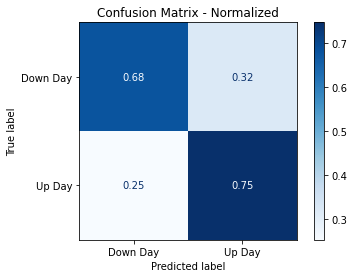

In [19]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))

disp = plot_confusion_matrix(rand_fc, x_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

## Feature Importance

In [20]:
#calculate feature importance and store in pandas series
features = pd.Series(rand_fc.feature_importances_, index=x_Cols.columns).sort_values(ascending=False)
features

R %          0.233312
K %          0.210204
RSI          0.204048
MACD         0.180421
Price ROC    0.172015
dtype: float64

Text(0.5, 1.0, 'Random Forest: Feature Importance Graph')

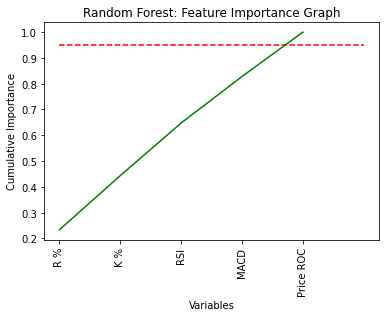

In [21]:
#store importance of features into a list
x_values = list(range(len(rand_fc.feature_importances_)))

#cumulative importances
cumulative_importances = np.cumsum(features.values)

#make a line graph
plt.plot(x_values, cumulative_importances, "g-")

#draw 95% importance retention
plt.hlines(y = 0.95, xmin = 0, xmax = len(features), color = 'r', linestyles = 'dashed')

#format xticks and labels
plt.xticks(x_values, features.index, rotation = "vertical")

#labels and title
plt.xlabel("Variables")
plt.ylabel("Cumulative Importance")
plt.title("Random Forest: Feature Importance Graph")



## Model Evaluation: ROC Curve

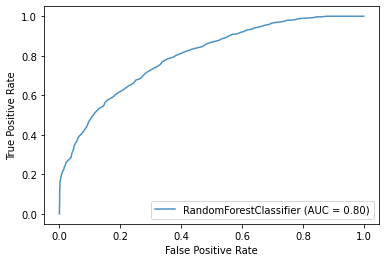

In [22]:
rfc = plot_roc_curve(rand_fc, x_test, y_test, alpha = 0.8)
plt.show()

## Model Evaluation: Out-Of-Bag Error Score

In [23]:
print('Random Forest Out-Of-Bag Error Score: {}'.format(rand_fc.oob_score_))

Random Forest Out-Of-Bag Error Score: 0.7028049575994781


## Model Improvement Randomized Search

In [24]:
#number of trees in random forest
# Number of trees is not a parameter that should be tuned, but just set large enough usually. There is no risk of overfitting in random forest with growing number of 
# trees, as they are trained independently from each other. 
n_estimators = list(range(200,2000,200))

#number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

#max number of levels in tree
max_depth = list(range(10,110,10))
max_depth.append(None)

#min number of samples require to split a node
min_samples_split = [2,5,10,20,30,40]

#min number of samples required at each leaf node
min_samples_leaf = [1,2,7,12,14,16,20]

#method of selecting samples for training each tree
bootstrap = [True, False]

#create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 20, 30, 40], 'min_samples_leaf': [1, 2, 7, 12, 14, 16, 20], 'bootstrap': [True, False]}


## Model Improvement Running Randomized Search

In [25]:
# New Random Forest Classifier to house optimal parameters
rf = RandomForestClassifier()

# Specfiy the details of our Randomized Search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 7, 12, 14,
                                                             16, 20],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
          

In [26]:
#we now have the new random classifier trained we can now do prediction
 
# Once the predictions have been made, then grab the accuracy score.
print('Correct Prediction (%): ', accuracy_score(y_test, rf_random.predict(x_test), normalize = True) * 100.0)

# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rand_fc.feature_importances_, index=x_Cols.columns).sort_values(ascending=False)

Correct Prediction (%):  72.10485133020345


,precision,recall,f1-score,support
Down Day,0.695993,0.677693,0.686721,1179.000000
Up Day,0.730114,0.746550,0.738241,1377.000000
accuracy,0.714789,0.714789,0.714789,0.714789
macro avg,0.713053,0.712122,0.712481,2556.000000
weighted avg,0.714375,0.714789,0.714476,2556.000000


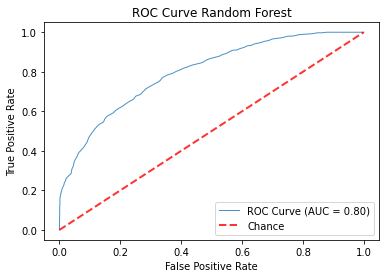

In [27]:
#ROC Curve
fig, ax = plt.subplots()

# Create an ROC Curve plot.
rfc_disp = plot_roc_curve(rand_fc, x_test, y_test, alpha = 0.8, name='ROC Curve', lw=1, ax=ax)

# Add our Chance Line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Make it look pretty.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve Random Forest")

# Add the legend to the plot
ax.legend(loc="lower right")

plt.show()